In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals, unicode_literals

import tensorflow as tf

import numpy as np
import skimage
import cv2
import scipy.io
import pprint
import glob

import PIL as pillow
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import os
import matplotlib


import json

import random
from sklearn.model_selection import train_test_split

import config
from data_util import *
from visualization import *
from metrics import *
from model import *

import open3d
import open3d as o3d

%matplotlib notebook

Using TensorFlow backend.


In [2]:
model_our = load_model_2()
model_our.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.print instead of tf.Print. Note that tf.print returns a no-output operator that directly prints the output. Outside of defuns or eager mode, this operator will not be executed unless it is directly specified in session.run or used as a control dependency for other operators. This is only a concern in graph mode. Below is an example of how to ensure tf.print executes in graph mode:
```python
    sess = tf.Session()
    with sess.as_default():
        tensor = tf.range(10)
        print_op = tf.print(tensor)
        with tf.control_dependencies([print_op]):
          out = tf.add(tensor, tensor)
        sess.run(out)
    ```
Additionally, to use tf.print in python 2.7, users must make sure to import
the following:

  `from __future__ import print_function`

_________________________________________________________________
Layer (type)  

In [3]:
# model_our.load_weights('train_full_train.h5')
# val_loss_arr = np.load('val_loss_progress.npy')
# loss_arr = np.load('loss_progress.npy')

In [4]:
directory = './data_not_raw'
val_directory = './val_data_not_raw'

train_list = create_full_dir_list('./data_not_raw')['pathname_base']
val_list = create_full_dir_list('./val_data_not_raw')['pathname_base']

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60/60 [==============================] - 54s 892ms/step - loss: 583238.9568 - val_loss: 663818.7234
Epoch 2/10
60/60 [==============================] - 46s 762ms/step - loss: 197342.0884 - val_loss: 217762.9078
Epoch 3/10
60/60 [==============================] - 48s 794ms/step - loss: 94407.4448 - val_loss: 128298.4449
Epoch 4/10
60/60 [==============================] - 50s 828ms/step - loss: 54055.8225 - val_loss: 84247.3422
Epoch 5/10
60/60 [==============================] - 48s 800ms/step - loss: 34384.6057 - val_loss: 60089.4329
Epoch 6/10
60/60 [==============================] - 47s 785ms/step - loss: 22808.1990 - val_loss: 44541.2842
Epoch 7/10
60/60 [==============================] - 48s 795ms/step - loss: 16689.1994 - val_loss: 27293.4675
Epoch 8/10
60/60 [==============================] - 49s 813ms/step - loss: 12283.5300 - val_loss: 20517.1248
Epoch 9/10
60/60 [==============================] - 48s 801ms/step - loss: 

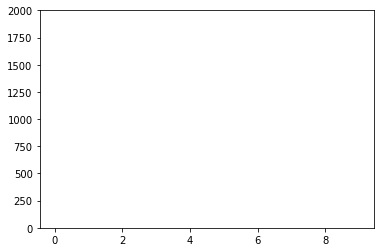

Epoch 1/10
60/60 [==============================] - 48s 798ms/step - loss: 5972.0312 - val_loss: 11231.8886
Epoch 2/10
60/60 [==============================] - 48s 799ms/step - loss: 5245.2663 - val_loss: 7137.0233
Epoch 3/10
60/60 [==============================] - 47s 786ms/step - loss: 3888.9646 - val_loss: 10440.0515
Epoch 4/10
60/60 [==============================] - 48s 792ms/step - loss: 3521.9275 - val_loss: 9279.7403
Epoch 5/10
60/60 [==============================] - 47s 787ms/step - loss: 2892.2262 - val_loss: 8194.3180
Epoch 6/10
60/60 [==============================] - 47s 786ms/step - loss: 2493.0263 - val_loss: 6908.8369
Epoch 7/10
60/60 [==============================] - 47s 787ms/step - loss: 3149.0755 - val_loss: 6225.9168
Epoch 8/10
60/60 [==============================] - 47s 783ms/step - loss: 2052.8647 - val_loss: 3834.0015
Epoch 9/10
60/60 [==============================] - 47s 787ms/step - loss: 1792.3328 - val_loss: 3685.0704
Epoch 10/10
60/60 [================

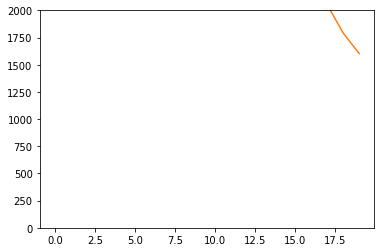

searching in directory./val_data_not_raw
avg_iou 0.21445363227145045
recall50 0.0
recall75 0.0
avg_obj 0.016920076911903205
avg_noobj 0.028600795462431095
avg_cat 0.22280543172520878
conf_change -12.987440724740736
Epoch 1/10
60/60 [==============================] - 48s 792ms/step - loss: 1407.5176 - val_loss: 3582.9913
Epoch 2/10
60/60 [==============================] - 47s 786ms/step - loss: 1265.4865 - val_loss: 2931.2676
Epoch 3/10
60/60 [==============================] - 48s 792ms/step - loss: 1338.6524 - val_loss: 2674.4132
Epoch 4/10
60/60 [==============================] - 48s 805ms/step - loss: 1056.1443 - val_loss: 2492.8426
Epoch 5/10
60/60 [==============================] - 48s 803ms/step - loss: 935.0825 - val_loss: 2161.3085
Epoch 6/10
60/60 [==============================] - 48s 808ms/step - loss: 922.4514 - val_loss: 2112.6139
Epoch 7/10
60/60 [==============================] - 48s 792ms/step - loss: 845.6119 - val_loss: 2078.0677
Epoch 8/10
60/60 [=====================

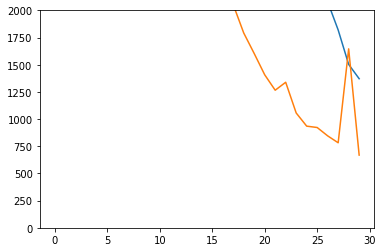

Epoch 1/10
60/60 [==============================] - 48s 803ms/step - loss: 690.2958 - val_loss: 1259.7553
Epoch 2/10
60/60 [==============================] - 49s 815ms/step - loss: 629.4578 - val_loss: 1082.2595
Epoch 3/10
60/60 [==============================] - 50s 839ms/step - loss: 591.0302 - val_loss: 1385.4561
Epoch 4/10
60/60 [==============================] - 48s 800ms/step - loss: 538.2610 - val_loss: 1304.3999
Epoch 5/10
60/60 [==============================] - 49s 811ms/step - loss: 520.9675 - val_loss: 1026.8446
Epoch 6/10
60/60 [==============================] - 49s 815ms/step - loss: 618.8889 - val_loss: 902.3870
Epoch 7/10
60/60 [==============================] - 48s 797ms/step - loss: 455.6328 - val_loss: 923.3777
Epoch 8/10
60/60 [==============================] - 48s 799ms/step - loss: 1254.6037 - val_loss: 783.3145
Epoch 9/10
60/60 [==============================] - 48s 800ms/step - loss: 546.1271 - val_loss: 738.5201
Epoch 10/10
60/60 [==============================

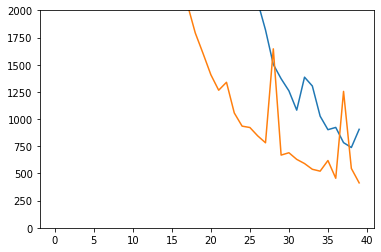

Epoch 1/10
60/60 [==============================] - 47s 790ms/step - loss: 1123.3884 - val_loss: 650.9189
Epoch 2/10
60/60 [==============================] - 47s 785ms/step - loss: 468.3792 - val_loss: 997.1565
Epoch 3/10
60/60 [==============================] - 48s 792ms/step - loss: 431.0110 - val_loss: 1064.4309
Epoch 4/10
60/60 [==============================] - 48s 796ms/step - loss: 381.4588 - val_loss: 816.5746
Epoch 5/10
60/60 [==============================] - 48s 799ms/step - loss: 336.3385 - val_loss: 844.0564
Epoch 6/10
60/60 [==============================] - 48s 792ms/step - loss: 475.9211 - val_loss: 647.3756
Epoch 7/10
60/60 [==============================] - 48s 796ms/step - loss: 355.3022 - val_loss: 663.1750
Epoch 8/10
60/60 [==============================] - 48s 796ms/step - loss: 344.4679 - val_loss: 670.0639
Epoch 9/10
22/60 [==========>...................] - ETA: 26s - loss: 316.0760

In [ ]:
#new_version
val_loss_arr = []
loss_arr = []

plt.figure()
counter = 0

while True:
    H = model_our.fit_generator(generator_train_new(train_list), validation_data= return_test_new(val_list), steps_per_epoch= 60, epochs = 10)
    val_loss_arr.append(H.history['val_loss'])
    loss_arr.append(H.history['loss'])
    
    plt.ylim(0,2000)
    plt.plot(np.ravel(np.array(val_loss_arr)))
    plt.plot(np.ravel(np.array(loss_arr)))
    plt.show()
    
    if counter%3 == 1:
        metrics_numpy_new(model_our, directory= val_directory)
    counter += 1

In [5]:
metrics_numpy_new(model_our, './val_data_not_raw/')

searching in directory./val_data_not_raw/
loading ./val_data_not_raw/Data_30-May-2018 13-29-23/0
loading ./val_data_not_raw/Data_30-May-2018 13-29-23/1
loading ./val_data_not_raw/Data_30-May-2018 13-29-23/2
loading ./val_data_not_raw/Data_30-May-2018 13-29-23/3
loading ./val_data_not_raw/Data_30-May-2018 13-29-23/4
loading ./val_data_not_raw/Data_30-May-2018 13-29-23/5
loading ./val_data_not_raw/Data_30-May-2018 13-29-23/6
loading ./val_data_not_raw/Data_30-May-2018 13-29-23/7
loading ./val_data_not_raw/Data_30-May-2018 13-29-23/8
loading ./val_data_not_raw/Data_30-May-2018 13-29-23/9
loading ./val_data_not_raw/Data_30-May-2018 13-29-23/10
loading ./val_data_not_raw/Data_30-May-2018 13-29-23/11
loading ./val_data_not_raw/Data_30-May-2018 13-29-23/12
loading ./val_data_not_raw/Data_30-May-2018 13-29-23/13
loading ./val_data_not_raw/Data_30-May-2018 13-29-23/14
loading ./val_data_not_raw/Data_30-May-2018 13-29-23/15
loading ./val_data_not_raw/Data_30-May-2018 13-29-23/16
loading ./val_da

In [6]:
metrics_numpy_targets_new(model_our, './val_data_not_raw/')

searching in directory./val_data_not_raw/
avg_iou 0.011484831547728419
avg_precision 0.0007560487594174115
recall50 0.02423076923076923
true_counter: 130
prediction counter:  5591


In [27]:
# save_logs(model_our,val_loss_arr, loss_arr)

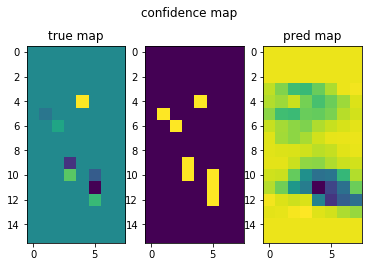

In [6]:
frame, labels, y_true = process_oneframe(train_list[10])
y_pred = model_our.predict(frame)
show_comparison_object_level(y_true, y_pred)

In [7]:
boxes = decode_netout(y_pred)
# print(len(boxes), boxes)

29 [[338.87862396240234, 69.73996829986572, 28.040637016296387, 265.487796664238, 113.72320652008057, 64.8882246017456, 0.6285463, 0], [338.43830490112305, 70.04444980621338, 35.942251205444336, 282.19059109687805, 119.913090467453, 61.126365661621094, 0.6467111, 0], [337.83244705200195, 85.9320764541626, 27.972407817840576, 258.1962835788727, 101.4700448513031, 74.57414150238037, 0.62016237, 0], [337.3095531463623, 86.39928960800171, 35.99226260185242, 274.1447287797928, 110.69825530052185, 68.52466583251953, 0.6419145, 0], [336.9811248779297, 102.74153327941895, 36.094411849975586, 246.63590848445892, 122.07748651504517, 56.71208381652832, 0.6002292, 0], [374.30789947509766, 52.66397523880005, 20.461926460266113, 247.94072151184082, 145.7213008403778, 54.20144557952881, 0.653745, 0], [376.82621002197266, 52.30048990249634, 28.621137619018555, 319.5264059305191, 167.56187796592712, 80.17576217651367, 0.6806489, 0], [375.4231777191162, 51.99477028846741, 36.25477695465088, 339.80351269

In [8]:
for i in labels:
    print(i)

[ 49.   157.75  66.75  20.    20.    44.5   20.  ]
[ 52.   165.75  19.25  20.    20.    29.5   20.  ]
[ 53.   203.25  32.25  20.    17.    50.5   20.  ]
[ 53.   293.5   52.75  20.    11.5   29.5   20.  ]
[ 53.  324.   84.5  20.   12.5  38.   20. ]
[ 53.  333.5  60.5  20.   13.5  37.   20. ]
[ 53.   354.25  81.5   20.     9.    39.    20.  ]
[ 53.   387.25  83.5   20.    18.    59.    20.  ]


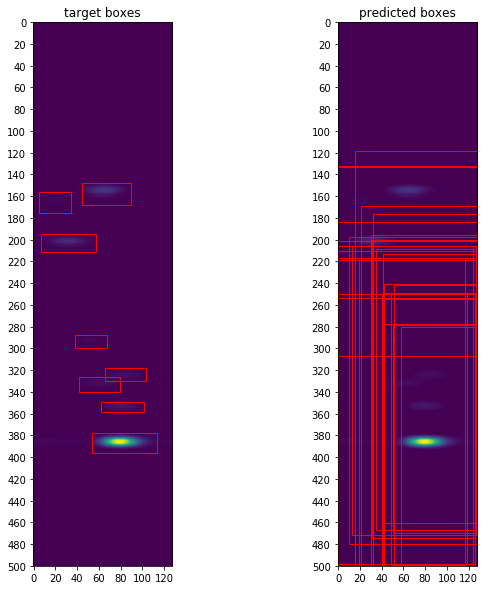

In [9]:
visualise_bird_view(frame,labels, boxes)

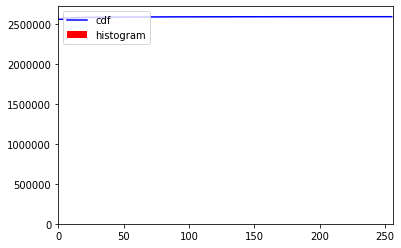

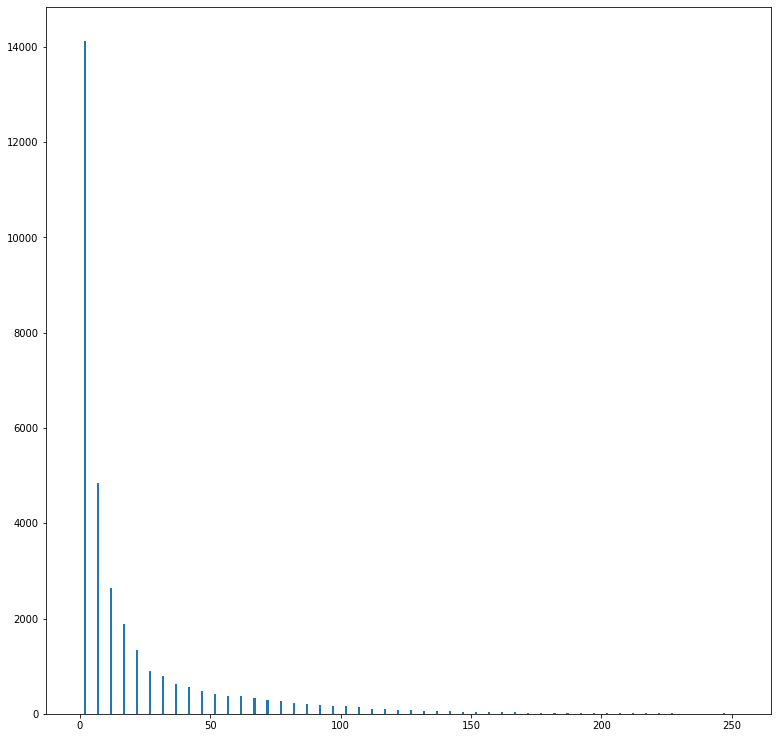

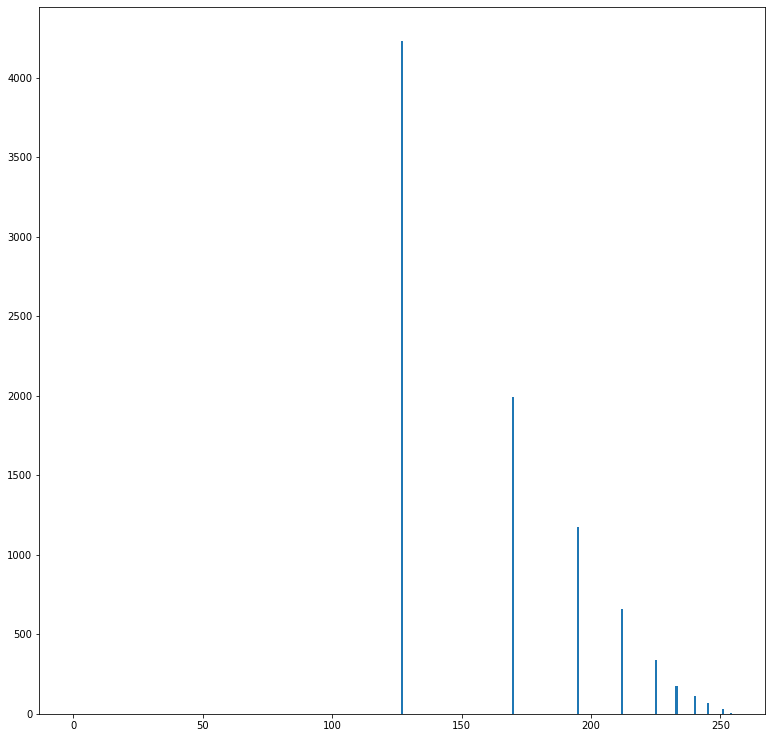

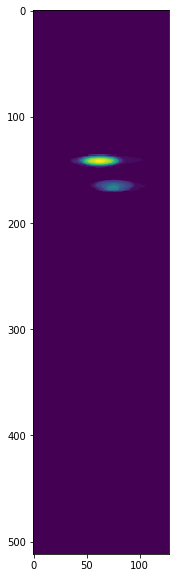

In [13]:
histogram_array = np.histogram(frame[0,...,0],bins = 256)
cdf = histogram_array[0].cumsum()
cdf_normalized = cdf*histogram_array[0].max()/cdf.max()


# print(histogram_array)

plt.plot(cdf_normalized, color = 'b')
plt.hist(frame.flatten(),256, color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

frame_equalised = cdf[frame[0,...,0]]

plt.figure(figsize = (13,13))
plt.bar(range(len(histogram_array[0][3:])),histogram_array[0][3:])
plt.show()


histogram_array_equalised = np.histogram(frame_equalised,bins = 256)
plt.figure(figsize = (13,13))
plt.bar(range(len(histogram_array_equalised[0][1:])), histogram_array_equalised[0][1:])
plt.show()

plt.figure(figsize = (10,10))
plt.imshow(np.sum(frame_equalised,2))
plt.show()

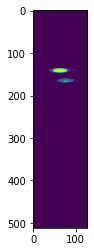

In [14]:
from skimage import data
from skimage import filters

val = filters.threshold_otsu(frame_equalised)
mask = frame_equalised > val

plt.imshow(np.sum(mask,2))

from skimage import measure
all_labels = measure.label(mask)


from skimage.morphology import watershed
from skimage.feature import peak_local_max
import skimage


from scipy import ndimage
distance = ndimage.distance_transform_edt(frame_equalised)
local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((3, 3,3)), labels=frame_equalised)
markers = skimage.morphology.label(local_maxi)
labels_ws = watershed(-distance, markers, mask=frame_equalised)


In [51]:
from ipywidgets import interact

# mask = mask.astype(np.int8)


def f(x):
    plt.figure(figsize = (15,15))
    if x in list(range(all_labels.shape[-1])):
        plt.imshow(all_labels[...,x])
    return x


interact(f,x = (0, all_labels.shape[-1]-1))

interactive(children=(IntSlider(value=19, description='x', max=39), Output()), _dom_classes=('widget-interact'…

<function __main__.f(x)>

In [72]:
def f(x):
    if x in list(range(labels_ws.shape[-1])):
        plt.imshow(labels_ws[...,x])
    return x

plt.figure(figsize = (9,9))
interact(f,x = (0, labels_ws.shape[-1]-1))

<Figure size 648x648 with 0 Axes>

interactive(children=(IntSlider(value=19, description='x', max=39), Output()), _dom_classes=('widget-interact'…

<function __main__.f(x)>

In [25]:
import scipy.ndimage
targets_generated = scipy.ndimage.find_objects(all_labels)
len(targets_generated)

2

In [26]:
def filtering_boxes(bounds):
    min_size = 20
    
    dim_size = [item_dim[1] - item_dim[0] for item_dim in bounds]
    
    box_prod = np.prod(dim_size)
    
    print(dim_size)
    print(box_prod)
    print(box_prod < min_size)
    if box_prod > min_size:
        return bounds
    else:
        return 0

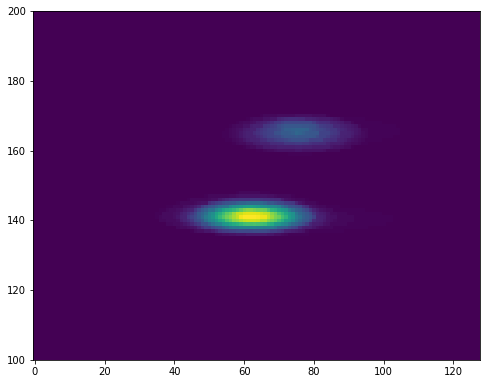

In [38]:
plt.figure(figsize = (8,8))
plt.imshow(np.sum(frame_equalised,axis = -1))
plt.ylim((100,200))
plt.show()


In [27]:
targets_matric = np.zeros((len(targets_generated), 2*N_DIM))

count = 0
bounding_boxes = []
for ind in range(len(targets_generated)):
    item = targets_generated[ind]
    bounds = [(item[j].start,item[j].stop) for j in range(len(item))]
    bounds_processed = filtering_boxes(bounds)
    if bounds_processed == 0:
        continue
    count += 1
    print(bounds)
    bbox = []
    for dim in range(len(bounds)):
        start = bounds[dim][0]
        end = bounds[dim][1]
        center = (end + start)/2
        width = (end - start)
        bbox.append([center,width])
#     print(bbox[0][0], bbox[1][0], bbox[2][0],bbox[0][1], bbox[1][1], bbox[2][1])
    bounding_boxes.append([bbox[0][0], bbox[1][0], bbox[2][0],bbox[0][1], bbox[1][1], bbox[2][1]])
    
print(count)

np.array(bounding_boxes)

[13, 68, 22]
19448
False
[(136, 149), (35, 103), (18, 40)]
[12, 51, 16]
9792
False
[(159, 171), (54, 105), (24, 40)]
2


array([[142.5,  69. ,  29. ,  13. ,  68. ,  22. ],
       [165. ,  79.5,  32. ,  12. ,  51. ,  16. ]])

[142.5, 69.0, 29.0, 13, 68, 22] 69.0 68 142.5 13
[165.0, 79.5, 32.0, 12, 51, 16] 79.5 51 165.0 12


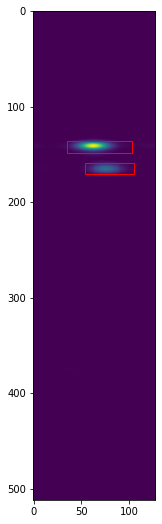

In [47]:
im = np.sum(frame,axis = (0,3,4))

fig,ax = plt.subplots(1, figsize = (9,9))

# Display the image
ax.imshow(im)


for box in bounding_boxes:
    y = box[0]
    x = box[1]
    w = box[3]
    l = box[4]
    x_t = x-l/2
    x_b = x+l/2 
    y_t = y-w/2
    y_b = y+w/2
    rect = patches.Rectangle((x_t,y_t),l,w,linewidth=1,edgecolor='r',facecolor='none')
    ax.add_patch(rect)

plt.show()

In [122]:
pcd = create_pointcloud(pointcloud_coords_generation(frame_equalised)[0])

bb_objects = []
bb_cords = []

for i in range(len(bounding_boxes)):
    
#     boxes_points = get_all_points(bounding_boxes[i])
#     vertices = boxes_points
    
    cx = bounding_boxes[i][0]
    cy = bounding_boxes[i][1]
    cz = bounding_boxes[i][2]
    l  = bounding_boxes[i][3]
    w  = bounding_boxes[i][4]
    h  = bounding_boxes[i][5]
    
    
    cx,cy,cz = tocartesian(cx,cy,cz)
    
    new_l = l*(67/512)
    new_w = 2*(cx+new_l/2)*np.tan(((w-64)/2)*(114/128)*np.pi/180)
    new_h = 2*(cz+new_l/2)*np.tan((h/2)*(16/40)*np.pi/180)
    
    l = new_l/2
    w = new_w/2
    h = new_h/2

    vertices = [] 

    for i in [-l,l]:
        for j in [-w,w]:
            for k in [-h,h]:
                vertices.append([cx+i,cy+j,cz+k])
                
    lines = [[0,1],[0,2],[1,3],[2,3],
         [4,5],[4,6],[5,7],[6,7],
         [0,4],[1,5],[2,6],[3,7]]
    colors = [[1, 0, 0] for i in range(len(lines))]
    line_set = o3d.geometry.LineSet()
    line_set.points = o3d.utility.Vector3dVector(vertices)
    line_set.lines = o3d.utility.Vector2iVector(lines)
    line_set.colors = o3d.utility.Vector3dVector(colors)
    bb_cords.append([cx,cy,cz,l,w,h])
    bb_objects.append(line_set)
    
o3d.visualization.draw_geometries([pcd, *bb_objects])

In [124]:
def bb_dict_create(bb_cords):
    whole_dict = {}
    whole_dict['bounding_boxes'] = []
    
    for i in range(len(bb_cords)):
        bb_dict = {}
        bb_dict.setdefault('center',{'x':0, 'y':0, 'z':0})
        
        bb_dict['center']['x']  = bb_cords[i][0]
        bb_dict['center']['y']  = bb_cords[i][1]
        bb_dict['center']['z']  = bb_cords[i][2]
        bb_dict['width'] = bb_cords[i][3]
        bb_dict['length'] = bb_cords[i][4]
        bb_dict['height'] = bb_cords[i][5]
        bb_dict['angle'] = 0
        bb_dict['object_id'] = 'car'
        
        whole_dict['bounding_boxes'].append(bb_dict)
    
    return whole_dict

In [127]:
bb_dict_create(bb_cords)

{'bounding_boxes': [{'center': {'x': 18.21144782113539,
    'y': 1.4182814981585026,
    'z': 3.749592679963082},
   'width': 0.8505859375,
   'length': 0.5928044115111635,
   'height': 0.3539644536894255,
   'angle': 0,
   'object_id': 'car'},
  {'center': {'x': 20.447041537646193,
    'y': 5.024048880647653,
    'z': 4.783630158560959},
   'width': 0.78515625,
   'length': -2.1525931349264664,
   'height': 0.31134349624239666,
   'angle': 0,
   'object_id': 'car'}]}

In [ ]:
json.

In [104]:
def get_all_points(box):
    cx = box[0]
    cy = box[1]
    cz = box[2]
    l = box[3]/2
    w = box[4]/2
    h = box[5]/2
    
    points = [] 
    
    for i in [-l,l]:
        for j in [-w,w]:
            for k in [-h,h]:
                points.append(tocartesian(cx+i, cy+j, cz+k))
    return points


def tocartesian(R_ind,phi_ind,theta_ind):
    
    R_real = 67
    R_imagery = 512
    phi_real = 114
    phi_imagery = 128
    theta_real = 16
    theta_imagery = 40
    
    theta = theta_ind*(theta_real/theta_imagery)*np.pi/180
    phi = ((phi_ind - phi_imagery/2)*(phi_real/phi_imagery))*np.pi/180 
    R = R_ind*(R_real/R_imagery)
    
    
    x = R*np.cos(theta)*np.cos(phi)
    y = R*np.cos(theta)*np.sin(phi)
    z = R*np.sin(theta)
    
    return [x,y,z]